## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________




In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.9476 - acc: 0.2998 - val_loss: 1.7967 - val_acc: 0.3523
Epoch 2/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.7425 - acc: 0.3799 - val_loss: 1.6822 - val_acc: 0.3991
Epoch 3/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.6544 - acc: 0.4135 - val_loss: 1.6361 - val_acc: 0.4220
Epoch 4/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5875 - acc: 0.4374 - val_loss: 1.6097 - val_acc: 0.4318
Epoch 5/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.5472 - acc: 0.4519 - val_loss: 1.5358 - val_acc: 0.4575
Epoch 6/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.5214 - acc: 0.4587 - val_loss: 1.5260 - val_acc: 0.4584
Epoch 7/500
50000/50000 

50000/50000 [==============================] - 5s 109us/step - loss: 1.0234 - acc: 0.6381 - val_loss: 1.4497 - val_acc: 0.5118
Epoch 56/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.0273 - acc: 0.6361 - val_loss: 1.4447 - val_acc: 0.5095
Epoch 57/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0158 - acc: 0.6398 - val_loss: 1.4100 - val_acc: 0.5227
Epoch 58/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0090 - acc: 0.6439 - val_loss: 1.4752 - val_acc: 0.5107
Epoch 59/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.9977 - acc: 0.6463 - val_loss: 1.4389 - val_acc: 0.5161
Epoch 60/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.9945 - acc: 0.6462 - val_loss: 1.4545 - val_acc: 0.5086
Epoch 61/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0134 - acc: 0.6381 - val_loss: 1.4384 - val_acc: 0.5147
Epoch 62/500
50000/50000 [===========

Epoch 114/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8233 - acc: 0.7048 - val_loss: 1.6118 - val_acc: 0.5134
Epoch 115/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8203 - acc: 0.7088 - val_loss: 1.6578 - val_acc: 0.5070
Epoch 116/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8183 - acc: 0.7073 - val_loss: 1.6741 - val_acc: 0.4962
Epoch 117/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8174 - acc: 0.7117 - val_loss: 1.6497 - val_acc: 0.5060
Epoch 118/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.8159 - acc: 0.7094 - val_loss: 1.6685 - val_acc: 0.5019
Epoch 119/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.8096 - acc: 0.7099 - val_loss: 1.6861 - val_acc: 0.4965
Epoch 120/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8118 - acc: 0.7106 - val_loss: 1.6762 - val_acc: 0.5044
Epoch 121/500
50000/

50000/50000 [==============================] - 5s 94us/step - loss: 0.7000 - acc: 0.7490 - val_loss: 1.8927 - val_acc: 0.4962
Epoch 173/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6927 - acc: 0.7523 - val_loss: 1.8743 - val_acc: 0.4973
Epoch 174/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.7101 - acc: 0.7476 - val_loss: 1.9213 - val_acc: 0.4968
Epoch 175/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6974 - acc: 0.7501 - val_loss: 1.9259 - val_acc: 0.4962
Epoch 176/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.7049 - acc: 0.7481 - val_loss: 1.9284 - val_acc: 0.4900
Epoch 177/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6908 - acc: 0.7532 - val_loss: 1.9464 - val_acc: 0.4941
Epoch 178/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6839 - acc: 0.7568 - val_loss: 1.9183 - val_acc: 0.4965
Epoch 179/500
50000/50000 [=======

50000/50000 [==============================] - 5s 94us/step - loss: 0.6157 - acc: 0.7799 - val_loss: 2.1832 - val_acc: 0.4845
Epoch 231/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6143 - acc: 0.7796 - val_loss: 2.1678 - val_acc: 0.4830
Epoch 232/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6054 - acc: 0.7838 - val_loss: 2.1895 - val_acc: 0.4873
Epoch 233/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.5999 - acc: 0.7854 - val_loss: 2.1787 - val_acc: 0.4852
Epoch 234/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6015 - acc: 0.7861 - val_loss: 2.1957 - val_acc: 0.4827
Epoch 235/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.6028 - acc: 0.7857 - val_loss: 2.2012 - val_acc: 0.4890
Epoch 236/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.6041 - acc: 0.7854 - val_loss: 2.2688 - val_acc: 0.4773
Epoch 237/500
50000/50000 [=======

50000/50000 [==============================] - 5s 94us/step - loss: 0.5647 - acc: 0.7976 - val_loss: 2.4352 - val_acc: 0.4781
Epoch 289/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.5521 - acc: 0.8037 - val_loss: 2.4590 - val_acc: 0.4761
Epoch 290/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.5416 - acc: 0.8078 - val_loss: 2.4171 - val_acc: 0.4830
Epoch 291/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.5348 - acc: 0.8108 - val_loss: 2.4676 - val_acc: 0.4729
Epoch 292/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.5483 - acc: 0.8028 - val_loss: 2.4440 - val_acc: 0.4742
Epoch 293/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.5365 - acc: 0.8083 - val_loss: 2.4534 - val_acc: 0.4843
Epoch 294/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.5239 - acc: 0.8153 - val_loss: 2.5053 - val_acc: 0.4642
Epoch 295/500
50000/50000 [=======

50000/50000 [==============================] - 5s 95us/step - loss: 0.5009 - acc: 0.8210 - val_loss: 2.7235 - val_acc: 0.4707
Epoch 347/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.4861 - acc: 0.8269 - val_loss: 2.7412 - val_acc: 0.4588
Epoch 348/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.4933 - acc: 0.8247 - val_loss: 2.7279 - val_acc: 0.4688
Epoch 349/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.4849 - acc: 0.8271 - val_loss: 2.7181 - val_acc: 0.4632
Epoch 350/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.4652 - acc: 0.8344 - val_loss: 2.7470 - val_acc: 0.4680
Epoch 351/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.4663 - acc: 0.8342 - val_loss: 2.7059 - val_acc: 0.4742
Epoch 352/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.4732 - acc: 0.8317 - val_loss: 2.8013 - val_acc: 0.4632
Epoch 353/500
50000/50000 [=

50000/50000 [==============================] - 5s 94us/step - loss: 0.4521 - acc: 0.8371 - val_loss: 2.9526 - val_acc: 0.4684
Epoch 405/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.4497 - acc: 0.8409 - val_loss: 3.0273 - val_acc: 0.4623
Epoch 406/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.4322 - acc: 0.8461 - val_loss: 3.0015 - val_acc: 0.4639
Epoch 407/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.4307 - acc: 0.8478 - val_loss: 3.0333 - val_acc: 0.4636
Epoch 408/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.4432 - acc: 0.8398 - val_loss: 3.0402 - val_acc: 0.4557
Epoch 409/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.4445 - acc: 0.8425 - val_loss: 2.9766 - val_acc: 0.4635
Epoch 410/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.4394 - acc: 0.8440 - val_loss: 2.9856 - val_acc: 0.4601
Epoch 411/500
50000/50000 [=======

50000/50000 [==============================] - 7s 131us/step - loss: 0.4038 - acc: 0.8560 - val_loss: 3.1771 - val_acc: 0.4581
Epoch 463/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.3788 - acc: 0.8646 - val_loss: 3.1798 - val_acc: 0.4602
Epoch 464/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.4041 - acc: 0.8552 - val_loss: 3.1794 - val_acc: 0.4662
Epoch 465/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.3813 - acc: 0.8657 - val_loss: 3.2128 - val_acc: 0.4666
Epoch 466/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.4026 - acc: 0.8563 - val_loss: 3.2099 - val_acc: 0.4640
Epoch 467/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3864 - acc: 0.8603 - val_loss: 3.2047 - val_acc: 0.4620
Epoch 468/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.3893 - acc: 0.8619 - val_loss: 3.2312 - val_acc: 0.4617
Epoch 469/500
50000/50000 [

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.2713 - acc: 0.9133 - val_loss: 3.3033 - val_acc: 0.4658
Epoch 2/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2450 - acc: 0.9262 - val_loss: 3.3079 - val_acc: 0.4652
Epoch 3/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2418 - acc: 0.9278 - val_loss: 3.3115 - val_acc: 0.4637
Epoch 4/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2402 - acc: 0.9286 - val_loss: 3.3122 - val_acc: 0.4650
Epoch 5/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2390 - acc: 0.9292 - val_loss: 3.3142 - val_acc: 0.4645
Epoch 6/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.2382 - acc: 0.9300 - val_loss: 3.3139 - val_acc: 0.4651
Epoch 7/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2374 - acc: 0.9304 - val_loss: 3.3156 -

50000/50000 [==============================] - 4s 90us/step - loss: 0.2262 - acc: 0.9350 - val_loss: 3.3602 - val_acc: 0.4617
Epoch 60/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.2262 - acc: 0.9354 - val_loss: 3.3591 - val_acc: 0.4615
Epoch 61/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2260 - acc: 0.9353 - val_loss: 3.3604 - val_acc: 0.4617
Epoch 62/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2260 - acc: 0.9356 - val_loss: 3.3626 - val_acc: 0.4622
Epoch 63/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.2258 - acc: 0.9354 - val_loss: 3.3628 - val_acc: 0.4617
Epoch 64/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2257 - acc: 0.9357 - val_loss: 3.3656 - val_acc: 0.4613
Epoch 65/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.2256 - acc: 0.9352 - val_loss: 3.3639 - val_acc: 0.4619
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 83us/step - loss: 0.2213 - acc: 0.9373 - val_loss: 3.3996 - val_acc: 0.4611
Epoch 119/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2213 - acc: 0.9372 - val_loss: 3.3999 - val_acc: 0.4609
Epoch 120/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.2212 - acc: 0.9373 - val_loss: 3.3989 - val_acc: 0.4614
Epoch 121/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2212 - acc: 0.9371 - val_loss: 3.4017 - val_acc: 0.4619
Epoch 122/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.2211 - acc: 0.9368 - val_loss: 3.4021 - val_acc: 0.4619
Epoch 123/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2210 - acc: 0.9372 - val_loss: 3.4026 - val_acc: 0.4623
Epoch 124/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2209 - acc: 0.9375 - val_loss: 3.4027 - val_acc: 0.4612
Epoch 125/500
50000

50000/50000 [==============================] - 5s 109us/step - loss: 0.2179 - acc: 0.9384 - val_loss: 3.4308 - val_acc: 0.4614
Epoch 177/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2178 - acc: 0.9380 - val_loss: 3.4321 - val_acc: 0.4607
Epoch 178/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2178 - acc: 0.9383 - val_loss: 3.4326 - val_acc: 0.4617
Epoch 179/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2177 - acc: 0.9384 - val_loss: 3.4330 - val_acc: 0.4626
Epoch 180/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2177 - acc: 0.9381 - val_loss: 3.4336 - val_acc: 0.4614
Epoch 181/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.2176 - acc: 0.9381 - val_loss: 3.4351 - val_acc: 0.4608
Epoch 182/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2175 - acc: 0.9384 - val_loss: 3.4347 - val_acc: 0.4623
Epoch 183/500
50000/50000 [=

50000/50000 [==============================] - 4s 78us/step - loss: 0.2150 - acc: 0.9393 - val_loss: 3.4586 - val_acc: 0.4611
Epoch 235/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2151 - acc: 0.9391 - val_loss: 3.4613 - val_acc: 0.4605
Epoch 236/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2150 - acc: 0.9392 - val_loss: 3.4619 - val_acc: 0.4602
Epoch 237/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2149 - acc: 0.9392 - val_loss: 3.4624 - val_acc: 0.4616
Epoch 238/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2149 - acc: 0.9395 - val_loss: 3.4627 - val_acc: 0.4609
Epoch 239/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.2148 - acc: 0.9394 - val_loss: 3.4620 - val_acc: 0.4609
Epoch 240/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2148 - acc: 0.9391 - val_loss: 3.4646 - val_acc: 0.4604
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 7s 137us/step - loss: 0.2127 - acc: 0.9399 - val_loss: 3.4856 - val_acc: 0.4608
Epoch 293/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.2126 - acc: 0.9404 - val_loss: 3.4881 - val_acc: 0.4602
Epoch 294/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.2125 - acc: 0.9401 - val_loss: 3.4869 - val_acc: 0.4614
Epoch 295/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2125 - acc: 0.9398 - val_loss: 3.4857 - val_acc: 0.4603
Epoch 296/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2125 - acc: 0.9404 - val_loss: 3.4874 - val_acc: 0.4612
Epoch 297/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.2125 - acc: 0.9399 - val_loss: 3.4896 - val_acc: 0.4610
Epoch 298/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.2124 - acc: 0.9400 - val_loss: 3.4903 - val_acc: 0.4602
Epoch 299/500
50000/50000 [===

50000/50000 [==============================] - 4s 81us/step - loss: 0.2104 - acc: 0.9405 - val_loss: 3.5122 - val_acc: 0.4617
Epoch 351/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2105 - acc: 0.9409 - val_loss: 3.5110 - val_acc: 0.4610
Epoch 352/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2104 - acc: 0.9413 - val_loss: 3.5124 - val_acc: 0.4602
Epoch 353/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.2104 - acc: 0.9408 - val_loss: 3.5129 - val_acc: 0.4604
Epoch 354/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.2104 - acc: 0.9411 - val_loss: 3.5131 - val_acc: 0.4612
Epoch 355/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.2103 - acc: 0.9406 - val_loss: 3.5147 - val_acc: 0.4616
Epoch 356/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2103 - acc: 0.9409 - val_loss: 3.5125 - val_acc: 0.4616
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.2085 - acc: 0.9415 - val_loss: 3.5343 - val_acc: 0.4602
Epoch 409/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2085 - acc: 0.9418 - val_loss: 3.5357 - val_acc: 0.4609
Epoch 410/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.2085 - acc: 0.9416 - val_loss: 3.5359 - val_acc: 0.4609
Epoch 411/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2085 - acc: 0.9415 - val_loss: 3.5342 - val_acc: 0.4605
Epoch 412/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2085 - acc: 0.9418 - val_loss: 3.5367 - val_acc: 0.4609
Epoch 413/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.2084 - acc: 0.9416 - val_loss: 3.5357 - val_acc: 0.4610
Epoch 414/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2083 - acc: 0.9421 - val_loss: 3.5370 - val_acc: 0.4607
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 0.2067 - acc: 0.9424 - val_loss: 3.5562 - val_acc: 0.4610
Epoch 467/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.2067 - acc: 0.9424 - val_loss: 3.5561 - val_acc: 0.4608
Epoch 468/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2066 - acc: 0.9426 - val_loss: 3.5559 - val_acc: 0.4598
Epoch 469/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2066 - acc: 0.9423 - val_loss: 3.5562 - val_acc: 0.4612
Epoch 470/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.2066 - acc: 0.9421 - val_loss: 3.5571 - val_acc: 0.4617
Epoch 471/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.2066 - acc: 0.9422 - val_loss: 3.5573 - val_acc: 0.4600
Epoch 472/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.2065 - acc: 0.9425 - val_loss: 3.5568 - val_acc: 0.4607
Epoch 473/500
50000/50000 [======

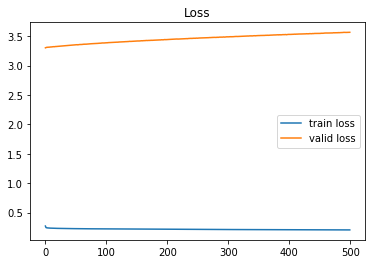

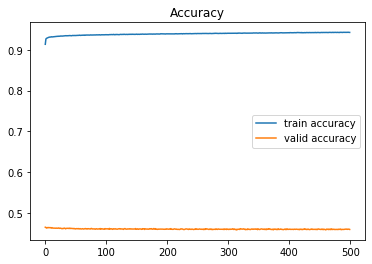

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()